In Unit 6, we saw how clustering can be used for market segmentation, the idea of dividing airline passengers into small, more similar groups, and then designing a marketing strategy specifically for each group.  In this problem, we'll see how this idea can be applied to retail consumer data.

In this problem, we'll use the dataset Households.csv, which contains data collected over two years for a group of 2,500 households.  Each row (observation) in our dataset represents a unique household.  The dataset contains the following variables:

    NumVisits = the number of times the household visited the retailer 
    AvgProdCount = the average number of products purchased per transaction
    AvgDiscount = the average discount per transaction from coupon usage (in %) - NOTE: Do not divide this value by 100!
    AvgSalesValue = the average sales value per transaction
    MorningPct = the percentage of visits in the morning (8am - 1:59pm)
    AfternoonPct = the percentage of visits in the afternoon (2pm - 7:59pm)

Note that some visits can occur outside of morning and afternoon hours.  That is, visits from 8pm - 7:59am are possible.

This dataset was derived from source files provided by dunnhumby, a customer science company based in the United Kingdom.

 Problem 1 - Reading in the data
(2 points possible)

Read the dataset Households.csv into R.

How many households have logged transactions at the retailer only in the morning?
- unanswered

How many households have logged transactions at the retailer only in the afternoon?

In [1]:
households = read.csv("Households.csv")

In [2]:
str(households)

'data.frame':	2500 obs. of  6 variables:
 $ NumVisits    : int  86 45 47 30 40 250 59 113 20 9 ...
 $ AvgProdCount : num  20.08 15.87 19.62 10.03 5.55 ...
 $ AvgDiscount  : num  8.11 7.44 14.37 3.85 2.96 ...
 $ AvgSalesValue: num  50.4 43.4 56.5 40 19.5 ...
 $ MorningPct   : num  46.51 8.89 14.89 13.33 2.5 ...
 $ AfternoonPct : num  51.2 60 76.6 56.7 67.5 ...


In [4]:
summary(households$MorningPct)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00   16.67   26.09   28.73   37.17  100.00 

In [7]:
sum(households$AfternoonPct==100)

[1] 13

In [8]:
sum(households$MorningPct==100)

[1] 4

 Problem 2 - Descriptive statistics
(3 points possible)

Of the households that spend more than $150 per transaction on average, what is the minimum average discount per transaction?
- unanswered

Of the households who have an average discount per transaction greater than 25%, what is the minimum average sales value per transaction?
- unanswered

In the dataset, what proportion of households visited the retailer at least 300 times?

In [10]:
tapply(households$AvgDiscount,households$AvgSalesValue>150, min)

FALSE     TRUE 
 0.08900 15.64607

In [11]:
tapply(households$AvgSalesValue,households$AvgDiscount>25, min)

FALSE    TRUE 
 2.3875 50.1175

In [13]:
table(households$NumVisits>=300)


FALSE  TRUE 
 2352   148 

In [15]:
148/(148+2352)

[1] 0.0592

In [17]:
summary(households)

   NumVisits       AvgProdCount     AvgDiscount     AvgSalesValue    
 Min.   :   1.0   Min.   : 1.186   Min.   : 0.089   Min.   :  2.388  
 1st Qu.:  39.0   1st Qu.: 6.123   1st Qu.: 3.006   1st Qu.: 18.329  
 Median :  79.0   Median : 8.979   Median : 4.865   Median : 27.417  
 Mean   : 110.6   Mean   :10.291   Mean   : 5.713   Mean   : 31.621  
 3rd Qu.: 142.2   3rd Qu.:13.116   3rd Qu.: 7.327   3rd Qu.: 40.546  
 Max.   :1300.0   Max.   :56.600   Max.   :47.176   Max.   :165.829  
   MorningPct      AfternoonPct   
 Min.   :  0.00   Min.   :  0.00  
 1st Qu.: 16.67   1st Qu.: 42.20  
 Median : 26.09   Median : 52.00  
 Mean   : 28.73   Mean   : 51.45  
 3rd Qu.: 37.17   3rd Qu.: 61.29  
 Max.   :100.00   Max.   :100.00  

 Problem 3 - Importance of Normalizing
(1/1 point)

When clustering data, it is often important to normalize the variables so that they are all on the same scale. If you clustered this dataset without normalizing, which variable would you expect to dominate in the distance calculations?

 Problem 4 - Normalizing the Data
(2 points possible)

Normalize all of the variables in the HouseHolds dataset by entering the following commands in your R console: (Note that these commands assume that your dataset is called "Households", and create the normalized dataset "HouseholdsNorm". You can change the names to anything you want by editing the commands.)

library(caret)

preproc = preProcess(Households)

HouseholdsNorm = predict(preproc, Households)

(Remember that for each variable, the normalization process subtracts the mean and divides by the standard deviation. We learned how to do this in Unit 6.) In your normalized dataset, all of the variables should have mean 0 and standard deviation 1.

What is the maximum value of NumVisits in the normalized dataset?
- unanswered

What is the minimum value of AfternoonPct in the normalized dataset?

In [18]:
library(caret)

Loading required package: lattice
Loading required package: ggplot2
Warning message:
: package ‘ggplot2’ was built under R version 3.3.0

In [19]:
preproc = preProcess(households)

In [21]:
HouseHoldsNorm = predict(preproc,households)

In [22]:
summary(HouseHoldsNorm)

   NumVisits        AvgProdCount      AvgDiscount      AvgSalesValue    
 Min.   :-0.9475   Min.   :-1.5239   Min.   :-1.4010   Min.   :-1.5342  
 1st Qu.:-0.6190   1st Qu.:-0.6976   1st Qu.:-0.6743   1st Qu.:-0.6976  
 Median :-0.2731   Median :-0.2197   Median :-0.2112   Median :-0.2206  
 Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000  
 3rd Qu.: 0.2737   3rd Qu.: 0.4728   3rd Qu.: 0.4021   3rd Qu.: 0.4684  
 Max.   :10.2828   Max.   : 7.7500   Max.   :10.3293   Max.   : 7.0432  
   MorningPct       AfternoonPct     
 Min.   :-1.6779   Min.   :-3.22843  
 1st Qu.:-0.7047   1st Qu.:-0.58006  
 Median :-0.1546   Median : 0.03458  
 Mean   : 0.0000   Mean   : 0.00000  
 3rd Qu.: 0.4926   3rd Qu.: 0.61755  
 Max.   : 4.1617   Max.   : 3.04658  

In [23]:
max(HouseHoldsNorm$NumVisits)

[1] 10.28281

In [24]:
min(HouseHoldsNorm$AfternoonPct)

[1] -3.228427

Run the following code to create a dendrogram of your data:

set.seed(200)
distances <- dist(HouseholdsNorm, method = "euclidean")
ClusterShoppers <- hclust(distances, method = "ward.D")
plot(ClusterShoppers, labels = FALSE)

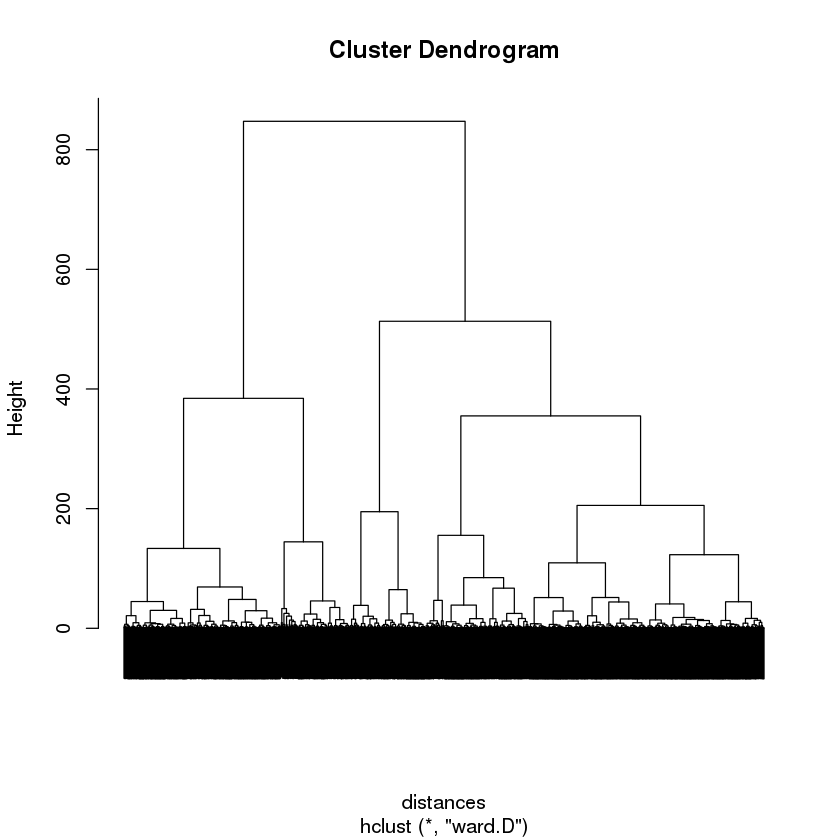

In [26]:

set.seed(200)
distances <- dist(HouseHoldsNorm, method = "euclidean")
ClusterShoppers <- hclust(distances, method = "ward.D")
plot(ClusterShoppers, labels = FALSE)

 Problem 6 - K-means Clustering
(2 points possible)

Run the k-means clustering algorithm on your normalized dataset, selecting 10 clusters. Right before using the kmeans function, type "set.seed(200)" in your R console.

How many observations are in the smallest cluster?
- unanswered

How many observations are in the largest cluster?

In [27]:
set.seed(200)
KMC = kmeans(HouseHoldsNorm,centers = 10)

In [28]:
KMC$centers

,NumVisits,AvgProdCount,AvgDiscount,AvgSalesValue,MorningPct,AfternoonPct
1,-0.2481149,1.4768542,1.2995075,1.4630282,-0.3484055,0.6582746
2,-0.4831678,3.7374075,3.4739658,3.5747198,0.1998456,-0.1276268
3,-0.23416257,0.29953633,0.29103420,0.30285030,-0.18244421,-0.01651476
4,-0.1798701,-0.5419201,-0.4572379,-0.5481618,2.4910609,-1.8112519
5,-0.2456230,-0.7355498,-0.6988240,-0.7400683,-0.5470039,0.2252972
6,1.480105440,-0.363857736,-0.352672495,-0.324038146,0.065276685,0.008440554
7,-0.09256621,0.86666142,0.90448250,0.98800423,1.44404053,-0.97966119
8,-0.26199562,-0.04997603,-0.10573215,-0.12033959,-0.89830632,1.41927237
9,4.4636731,-0.8514506,-0.7674102,-0.8051772,-0.2389930,-0.1704913
10,-0.3446394,-0.6379429,-0.5443075,-0.6261987,0.5047486,-0.7864421


In [29]:
HouseClusters = KMC$cluster

In [31]:
sort(table(HouseClusters))

HouseClusters
  2   9   4   7   6   1   8  10   3   5 
 51  52 118 141 226 246 284 388 490 504

In [32]:
spl = split(HouseHoldsNorm, HouseClusters)

In [33]:
lapply(spl, colMeans)

$`1`
    NumVisits  AvgProdCount   AvgDiscount AvgSalesValue    MorningPct 
   -0.2481149     1.4768542     1.2995075     1.4630282    -0.3484055 
 AfternoonPct 
    0.6582746 

$`2`
    NumVisits  AvgProdCount   AvgDiscount AvgSalesValue    MorningPct 
   -0.4831678     3.7374075     3.4739658     3.5747198     0.1998456 
 AfternoonPct 
   -0.1276268 

$`3`
    NumVisits  AvgProdCount   AvgDiscount AvgSalesValue    MorningPct 
  -0.23416257    0.29953633    0.29103420    0.30285030   -0.18244421 
 AfternoonPct 
  -0.01651476 

$`4`
    NumVisits  AvgProdCount   AvgDiscount AvgSalesValue    MorningPct 
   -0.1798701    -0.5419201    -0.4572379    -0.5481618     2.4910609 
 AfternoonPct 
   -1.8112519 

$`5`
    NumVisits  AvgProdCount   AvgDiscount AvgSalesValue    MorningPct 
   -0.2456230    -0.7355498    -0.6988240    -0.7400683    -0.5470039 
 AfternoonPct 
    0.2252972 

$`6`
    NumVisits  AvgProdCount   AvgDiscount AvgSalesValue    MorningPct 
  1.480105440  -0.363857736  -0.352672495  -0.324038146   0.065276685 
 AfternoonPct 
  0.008440554 

$`7`
    NumVisits  AvgProdCount   AvgDiscount AvgSalesValue    MorningPct 
  -0.09256621    0.86666142    0.90448250    0.98800423    1.44404053 
 AfternoonPct 
  -0.97966119 

$`8`
    NumVisits  AvgProdCount   AvgDiscount AvgSalesValue    MorningPct 
  -0.26199562   -0.04997603   -0.10573215   -0.12033959   -0.89830632 
 AfternoonPct 
   1.41927237 

$`9`
    NumVisits  AvgProdCount   AvgDiscount AvgSalesValue    MorningPct 
    4.4636731    -0.8514506    -0.7674102    -0.8051772    -0.2389930 
 AfternoonPct 
   -0.1704913 

$`10`
    NumVisits  AvgProdCount   AvgDiscount AvgSalesValue    MorningPct 
   -0.3446394    -0.6379429    -0.5443075    -0.6261987     0.5047486 
 AfternoonPct 
   -0.7864421

In [34]:
spl = split(households, HouseClusters)

In [35]:
lapply(spl, colMeans)

$`1`
    NumVisits  AvgProdCount   AvgDiscount AvgSalesValue    MorningPct 
     81.89431      19.11594      10.92924      59.49868      22.76746 
 AfternoonPct 
     61.93939 

$`2`
    NumVisits  AvgProdCount   AvgDiscount AvgSalesValue    MorningPct 
     54.70588      32.62351      19.65784      99.73684      32.15593 
 AfternoonPct 
     49.41508 

$`3`
    NumVisits  AvgProdCount   AvgDiscount AvgSalesValue    MorningPct 
    83.508163     12.081068      6.881078     37.391552     25.609449 
 AfternoonPct 
    51.185788 

$`4`
    NumVisits  AvgProdCount   AvgDiscount AvgSalesValue    MorningPct 
    89.788136      7.053082      3.877403     21.175564     71.391580 
 AfternoonPct 
    22.584436 

$`5`
    NumVisits  AvgProdCount   AvgDiscount AvgSalesValue    MorningPct 
     82.18254       5.89608       2.90764      17.51880      19.36659 
 AfternoonPct 
     55.03936 

$`6`
    NumVisits  AvgProdCount   AvgDiscount AvgSalesValue    MorningPct 
   281.796460      8.117065      4.297144     25.446228     29.851517 
 AfternoonPct 
    51.583481 

$`7`
    NumVisits  AvgProdCount   AvgDiscount AvgSalesValue    MorningPct 
    99.886525     15.469831      9.343551     50.447122     53.462000 
 AfternoonPct 
    35.836861 

$`8`
    NumVisits  AvgProdCount   AvgDiscount AvgSalesValue    MorningPct 
    80.288732      9.992614      5.288399     29.327693     13.350751 
 AfternoonPct 
    74.066827 

$`9`
    NumVisits  AvgProdCount   AvgDiscount AvgSalesValue    MorningPct 
   626.903846      5.203533      2.632325     16.278150     24.641085 
 AfternoonPct 
    48.731981 

$`10`
    NumVisits  AvgProdCount   AvgDiscount AvgSalesValue    MorningPct 
    70.729381      6.479314      3.527893     19.688575     37.377204 
 AfternoonPct 
    38.916046

In [36]:
set.seed(5000)
KMC1 = kmeans(HouseHoldsNorm,centers = 5)

In [38]:
sort(table(KMC1$cluster))

4   1   3   5   2 
172 182 428 724 994

In [39]:
spl = split(households, KMC1$cluster)
lapply(spl, colMeans)

$`1`
    NumVisits  AvgProdCount   AvgDiscount AvgSalesValue    MorningPct 
     64.60989      24.47666      14.69849      76.09221      31.49236 
 AfternoonPct 
     53.37519 

$`2`
    NumVisits  AvgProdCount   AvgDiscount AvgSalesValue    MorningPct 
    88.274648      6.573304      3.355126     19.679329     21.516913 
 AfternoonPct 
    53.900113 

$`3`
    NumVisits  AvgProdCount   AvgDiscount AvgSalesValue    MorningPct 
    91.095794      8.541218      4.910884     26.956499     54.594773 
 AfternoonPct 
    32.958057 

$`4`
    NumVisits  AvgProdCount   AvgDiscount AvgSalesValue    MorningPct 
   422.273256      7.074807      3.710112     22.317813     27.386172 
 AfternoonPct 
    51.043708 

$`5`
    NumVisits  AvgProdCount   AvgDiscount AvgSalesValue    MorningPct 
    90.276243     13.628410      7.640804     41.803608     22.980428 
 AfternoonPct 
    58.626883